In [ ]:
WORK_DIR = '/content/drive/MyDrive/SOC/OCR2'

In [ ]:
import os
import pandas as pd
from google.colab.patches import cv2_imshow
import cv2

Creating data - CSV file

In [ ]:
ground_path = WORK_DIR+'/Data/ground_truth'
ground_labels = os.listdir(ground_path)
# for file in os.listdir(ground_path):

FileNotFoundError: ignored

In [ ]:
sample_label = ground_labels[0]

In [ ]:
sample_label

'gt_201.txt'

In [ ]:

for sample_label in ground_labels:
  flag= 0
  with open(os.path.join(ground_path,sample_label), 'r') as f:
    list1 = f.readlines()
  if len(sample_label.split('_'))==2:
    image_path = WORK_DIR+'/Data/images/'+sample_label.split('.')[0].split('_')[1]+'.jpg'
    flag = 1
  else:
    image_path = sample_label.split('.')[0].split('_')[1:]
    image_path = '_'.join(image_path)+'.jpg'
    image_path = WORK_DIR+'/Data/images/'+ image_path

  image = cv2.imread(image_path)
  h,w,d = image.shape
  destination = image_path.split('.')[0]+'.txt'
  with open(destination, mode='w') as f:
    for line in list1:
      # print(line, sample_label)
      if flag == 1:
        line = [int(a) for a in line.strip().split(' ')[:4]]
      else:
        line = [int(a) for a in line.strip().split(', ')[:4]]
      xmin, ymin, xmax, ymax = line[0], line[1], line[2], line[3]

      centerx = (xmax+ xmin)/(2*w)
      centery = (ymax+ymin)/(2*h)
      width = (xmax-xmin)/(w)
      height = (ymax-ymin)/h

      label_txt = f'0 {centerx} {centery} {width} {height}\n'
      f.write(label_txt)




box = [ xmin, ymin, xmax, ymax]

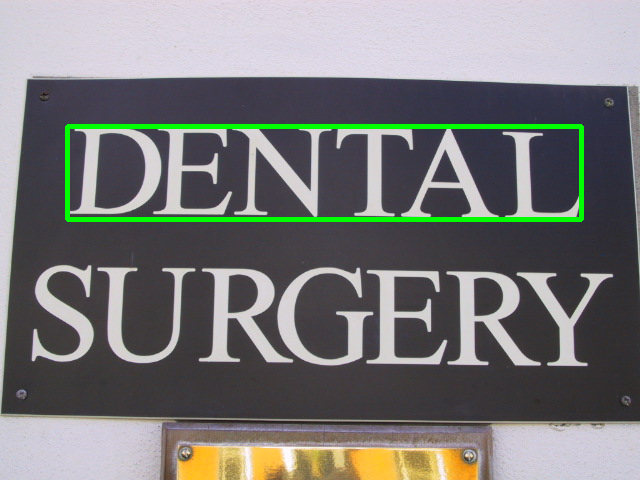

In [ ]:
# image = cv2.imread(image_path)
# cv2.rectangle(image,(box[0],box[1]),(box[2],box[3]),(0,255,0),3) 
# cv2_imshow(image)

In [ ]:
os.chdir(WORK_DIR)

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12547, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 12547 (delta 51), reused 59 (delta 29), pack-reused 12452
Receiving objects: 100% (12547/12547), 12.48 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (8585/8585), done.


In [ ]:
%%bash
cd yolov5
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
os.chdir('yolov5')

In [ ]:
!python train.py --data data.yaml --cfg yolov5s.yaml --batch-size 8 --name Model --epochs 100

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v6.1-373-g8f28ea4 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,